# **Project - ML**



**import the necessary libraries**

In [ ]:
# Import pandas for data manipulation
import pandas as pd

# Import numpy for numerical computations
import numpy as np

# Import matplotlib.pyplot for data visualization
import matplotlib.pyplot as plt

# Import time for measuring execution time
import time

# Import scipy.io for loading and saving MATLAB data files
import scipy.io

# Import StandardScaler for feature scaling in machine learning (Mean = 0 and std = 1)
from sklearn.preprocessing import StandardScaler

# Import PCA (Principal Component Analysis) for dimensionality reduction
from sklearn.decomposition import PCA

# Import KMeans for clustering using the K-Means algorithm
from sklearn.cluster import KMeans

# Import normalized_mutual_info_score and accuracy_score for clustering evaluation metrics
from sklearn.metrics import normalized_mutual_info_score, accuracy_score

# Import custom modules MCFS, construct_W, and unsupervised_evaluation
import MCFS  # Custom module for a specific feature selection technique
import construct_W  # Custom module for constructing a weight matrix
import unsupervised_evaluation  # Custom module for unsupervised evaluation metrics

# To load the PartGreedyFS code, adjust the sys path accordingly
import sys
sys.path.insert(0, '..')
import partgreedyfs  # Custom module, possibly for a different feature selection technique

**load and visualize data**

In [ ]:
#USPS data

USPS = scipy.io.loadmat('/content/USPS.mat')
USPS
print(type(USPS['X']),USPS['X'].shape,'\n\n')
X_USPS = pd.DataFrame(USPS['X'])
Y_USPS = pd.DataFrame(USPS['Y'])
print(X_USPS.info(),'\n ======== \n',Y_USPS.value_counts())

<class 'numpy.ndarray'> (9298, 256) 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9298 entries, 0 to 9297
Columns: 256 entries, 0 to 255
dtypes: float64(256)
memory usage: 18.2 MB
None 
 1     1553
2     1269
3      929
5      852
7      834
4      824
10     821
8      792
6      716
9      708
dtype: int64


In [ ]:
X_USPS.head()

,0,1,2,3,4,5,6,7,8,9,...,246,247,248,249,250,251,252,253,254,255
0,-1.000000,-1.000000,-1.000000,-0.999997,-0.999729,-0.989537,-0.860165,-0.395924,0.048299,-0.282151,...,0.131298,0.384728,0.433073,0.193397,-0.237439,-0.649848,-0.906359,-0.988672,-0.999475,-0.999994
1,-0.999927,-0.993644,-0.900309,-0.632621,-0.443145,-0.454436,-0.474872,-0.431176,-0.494539,-0.583648,...,-0.388084,-0.273639,0.001094,0.294825,0.316915,0.113494,-0.092331,-0.329390,-0.584681,-0.868793
2,-1.000000,-1.000000,-1.000000,-0.999995,-0.999986,-0.999987,-0.999990,-0.999316,-0.976299,-0.725917,...,-0.999778,-0.988816,-0.821857,-0.277379,0.136501,-0.247816,-0.809498,-0.988116,-0.999864,-1.000000
3,-0.999998,-0.999800,-0.994136,-0.932288,-0.673685,-0.192056,0.218820,0.337224,0.193371,-0.065072,...,-0.373861,0.196530,0.002823,-0.695900,-0.976372,-0.999458,-0.999996,-1.000000,-1.000000,-1.000000
4,-1.000000,-0.999971,-0.997452,-0.957499,-0.801681,-0.510623,-0.107965,0.217262,0.216431,-0.008529,...,0.214362,0.339240,0.458489,0.473456,0.372240,0.173322,-0.144182,-0.542254,-0.863031,-0.981978


In [ ]:
Y_USPS.head(20)

,0
0,7
1,6
2,5
3,8
4,4
5,7
6,4
7,2
8,1
9,2


In [ ]:
# Standardizing the features
# PCA is affected by scale, so you need to scale the features in your data before applying PCA.
X_USPS_scaled = StandardScaler().fit_transform(X_USPS)

In [ ]:
#For 2D visualization, set k=2 to project the data onto a plane
pca = PCA(n_components=2)

principalComponents = pca.fit_transform(X_USPS_scaled)

principalDf = pd.DataFrame(data = principalComponents
            , columns = ['c1', 'c2'])
#PCA and keeping the top two principal components
Y_USPS.columns = ["target"]

finalDf = pd.concat([principalDf, Y_USPS] , axis = 1)
finalDf.head(3)

,c1,c2,target
0,5.037319,-8.976495,7
1,14.162699,-1.789771,6
2,-1.283111,0.412694,5


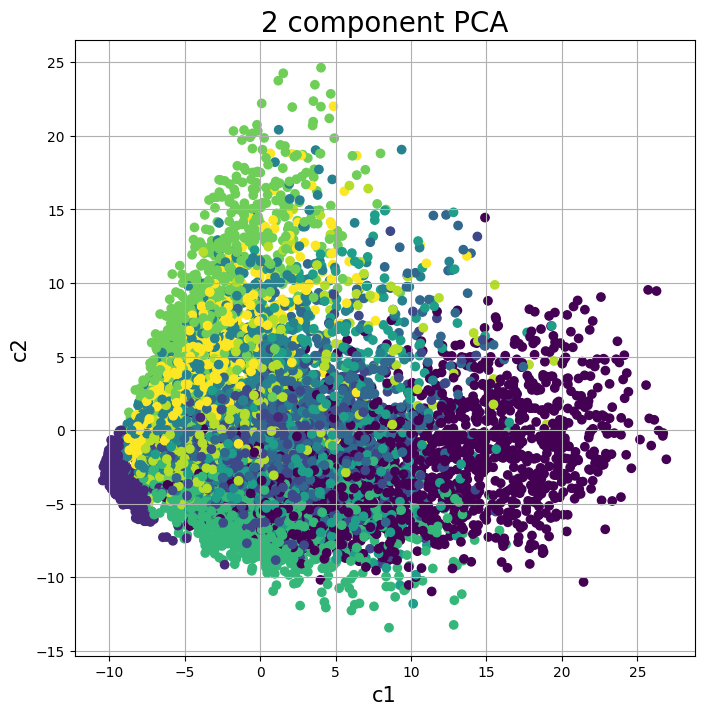

In [ ]:
# Visualize 2D Projection
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('c1', fontsize = 15)
ax.set_ylabel('c2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
ax.scatter(finalDf.loc[:, 'c1'] , finalDf.loc[:, 'c2'],c=finalDf.loc[:, 'target'])
ax.grid()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-26-9a0ee9536af5>:22: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(data_pca[:, 0], data_pca[:, 1], cmap='viridis')


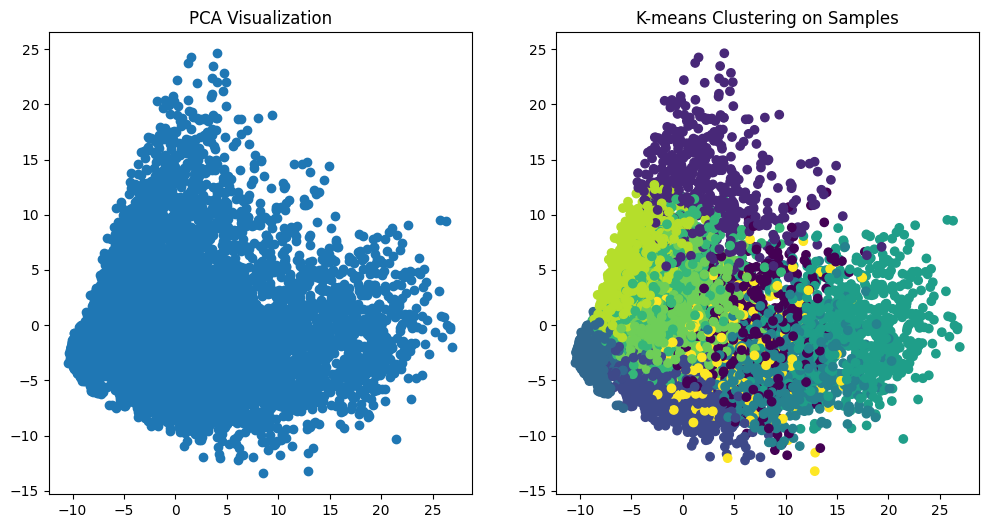

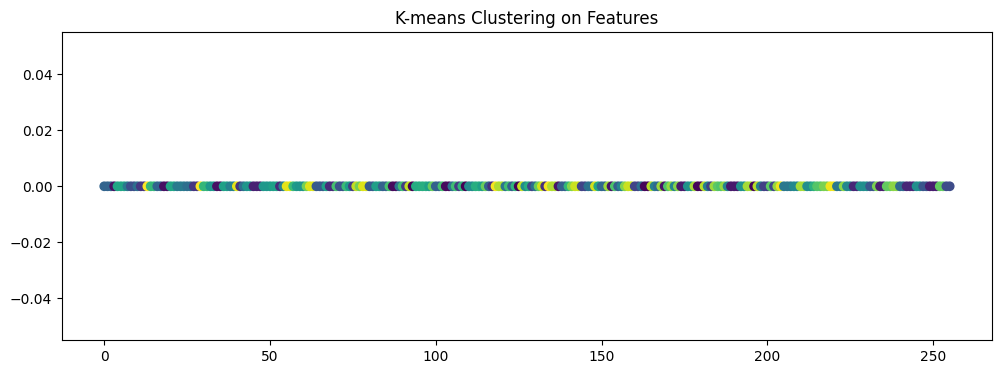

Accuracy for K-means on Samples: 1.0
Accuracy for K-means on Features: 1.0
The runTime: 21.631064414978027


In [ ]:
# PCA for dimensionality reduction
pca = PCA(n_components=2)  # 2D visualization
data_pca = pca.fit_transform(X_USPS_scaled)
start_time = time.time()
# K-means clustering on samples (using true classes as k value)
# true class of USPS dataSet is equal to 10
k=10
kmeans_samples = KMeans(n_clusters=k)
kmeans_samples.fit(X_USPS_scaled)
sample_clusters = kmeans_samples.labels_

# K-means clustering on features (k=30% of the number of features)
n_features = X_USPS_scaled.shape[1]
k_value_features = int(0.3 * n_features)
kmeans_features = KMeans(n_clusters=k_value_features)
kmeans_features.fit(X_USPS_scaled.T)  # Transpose data to cluster features
feature_clusters = kmeans_features.labels_

# Visualize the PCA result
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(data_pca[:, 0], data_pca[:, 1], cmap='viridis')
plt.title("PCA Visualization")

# Visualize K-means on samples
plt.subplot(1, 2, 2)
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=sample_clusters, cmap='viridis')
plt.title("K-means Clustering on Samples")
plt.show()

# Visualize K-means on features
plt.figure(figsize=(12, 4))
plt.scatter(range(n_features), [0] * n_features, c=feature_clusters, cmap='viridis')
plt.title("K-means Clustering on Features")
plt.show()
from sklearn.metrics import accuracy_score

# Assuming you have the true labels available for comparison
true_labels =  kmeans_samples.labels_  # Replace with the actual true labels

# Calculate accuracy for K-means on samples
sample_accuracy = accuracy_score( kmeans_samples.labels_, sample_clusters)

# Calculate accuracy for K-means on features
feature_accuracy = accuracy_score( kmeans_features.labels_, feature_clusters)

# Display the accuracies
end_time = time.time()
run_time = end_time-start_time
print("Accuracy for K-means on Samples:", sample_accuracy)
print("Accuracy for K-means on Features:", feature_accuracy)
print(f"The runTime: {run_time}")

In [ ]:
#LUNG data

lung = scipy.io.loadmat('/content/lung.mat')
lung
print(type(lung['X']),lung['X'].shape,'\n\n')
X_lung= pd.DataFrame(lung['X'])
Y_lung= pd.DataFrame(lung['Y'])
print(X_lung.info(),'\n ======== \n',Y_lung.value_counts())

<class 'numpy.ndarray'> (203, 3312) 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203 entries, 0 to 202
Columns: 3312 entries, 0 to 3311
dtypes: float64(3312)
memory usage: 5.1 MB
None 
 1    139
3     21
4     20
2     17
5      6
dtype: int64


In [ ]:
X_lung.head()

,0,1,2,3,4,5,6,7,8,9,...,3302,3303,3304,3305,3306,3307,3308,3309,3310,3311
0,3.865257,1.796990,1.643650,2.307902,3.411704,3.410870,3.527868,3.488609,3.600405,3.652136,...,2.183981,2.519171,1.000000,2.174641,2.902840,1.844850,2.647755,1.000000,2.219480,1.992730
1,3.763867,2.281193,2.199179,2.579235,3.382473,3.375192,3.514874,3.597044,3.663170,3.617475,...,2.295435,1.488551,1.000000,2.021685,3.244604,2.413166,2.418467,1.473341,3.005292,2.232793
2,3.906659,1.558888,1.723497,2.254814,3.205421,3.272266,3.473874,3.455869,3.625198,3.682693,...,2.036709,1.581893,1.000000,2.089145,3.131221,2.218641,2.441954,1.722881,2.635061,1.805569
3,3.809383,1.912355,1.856940,2.498944,3.289406,3.371232,3.541995,3.358976,3.473179,3.628930,...,1.869965,1.481658,1.000000,2.155032,3.270371,1.928473,2.618074,2.154013,2.530046,2.185514
4,3.861195,2.333064,2.299202,2.626987,3.400348,3.366804,3.525154,3.597381,3.686170,3.677235,...,1.617420,1.768268,1.081707,2.042339,3.166306,2.073095,2.505313,2.013553,2.916849,2.080482


In [ ]:
# Standardizing the features
# PCA is affected by scale, so you need to scale the features in your data before applying PCA.
X_lung_scaled = StandardScaler().fit_transform(X_lung)

In [ ]:
#a. For 2D visualization, set k=2 to project the data onto a plane
pca = PCA(n_components=2)

principalComponents = pca.fit_transform(X_lung_scaled)

principalDf = pd.DataFrame(data = principalComponents
            , columns = ['c1', 'c2'])
#PCA and keeping the top two principal components
Y_lung.columns = ["target"]

finalDf = pd.concat([principalDf, Y_lung] , axis = 1)
finalDf.head(3)

,c1,c2,target
0,4.706567,7.001266,1
1,-14.744266,7.732143,1
2,-21.460827,2.778485,1


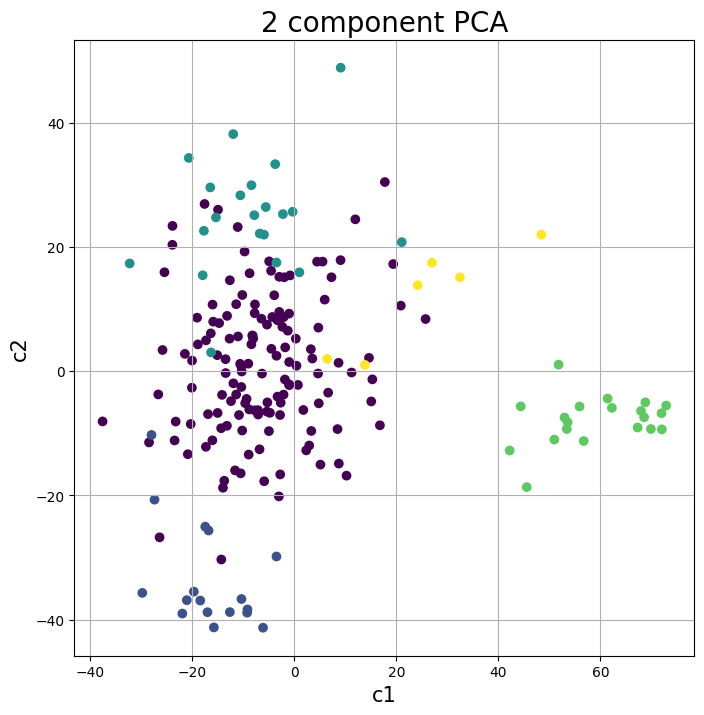

In [ ]:
#Step 4: Visualize 2D Projection
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('c1', fontsize = 15)
ax.set_ylabel('c2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
ax.scatter(finalDf.loc[:, 'c1'] , finalDf.loc[:, 'c2'],c=finalDf.loc[:, 'target'])
ax.grid()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-18-729712fc2c0d>:22: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(data_pca[:, 0], data_pca[:, 1], cmap='viridis')


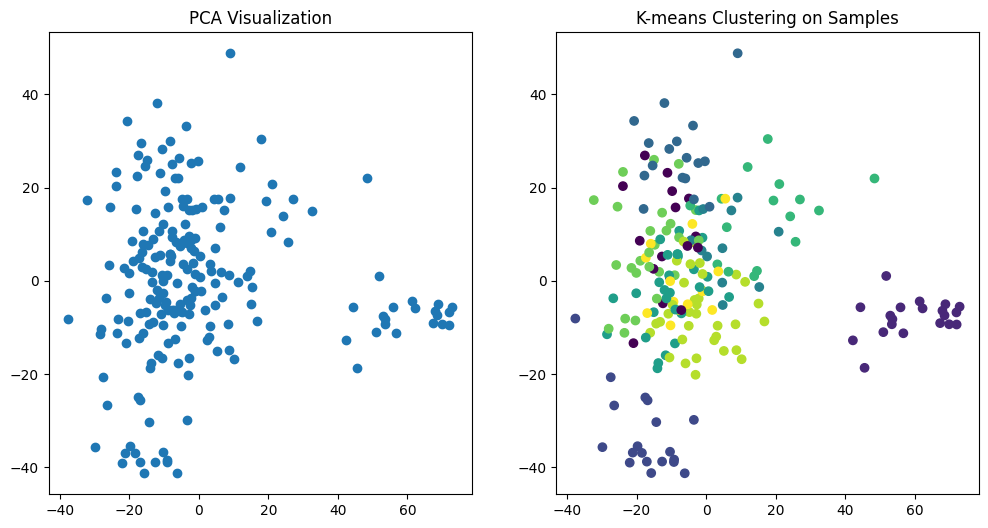

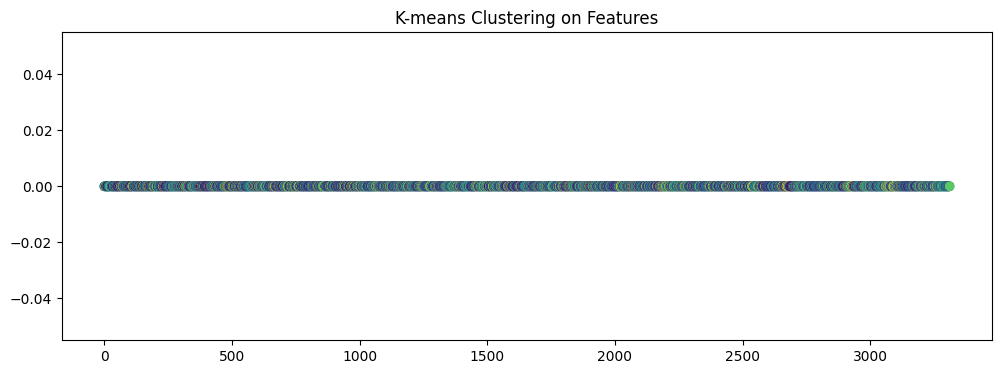

Accuracy for K-means on Samples: 1.0
Accuracy for K-means on Features: 1.0
The runTime: 29.276039600372314


In [ ]:
# PCA for dimensionality reduction
pca = PCA(n_components=2)  # 2D visualization
data_pca = pca.fit_transform(X_lung_scaled)
start_time = time.time()
# K-means clustering on samples (using true classes as k value)
# true class of USPS dataSet is equal to 10
k=10
kmeans_samples = KMeans(n_clusters=k)
kmeans_samples.fit(X_lung_scaled)
sample_clusters = kmeans_samples.labels_

# K-means clustering on features (k=30% of the number of features)
n_features = X_lung_scaled.shape[1]
k_value_features = int(0.3 * n_features)
kmeans_features = KMeans(n_clusters=k_value_features)
kmeans_features.fit(X_lung_scaled.T)  # Transpose data to cluster features
feature_clusters = kmeans_features.labels_

# Visualize the PCA result
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(data_pca[:, 0], data_pca[:, 1], cmap='viridis')
plt.title("PCA Visualization")

# Visualize K-means on samples
plt.subplot(1, 2, 2)
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=sample_clusters, cmap='viridis')
plt.title("K-means Clustering on Samples")
plt.show()

# Visualize K-means on features
plt.figure(figsize=(12, 4))
plt.scatter(range(n_features), [0] * n_features, c=feature_clusters, cmap='viridis')
plt.title("K-means Clustering on Features")
plt.show()


# Assuming you have the true labels available for comparison
true_labels =  kmeans_samples.labels_  # Replace with the actual true labels

# Calculate accuracy for K-means on samples
sample_accuracy = accuracy_score( kmeans_samples.labels_, sample_clusters)

# Calculate accuracy for K-means on features
feature_accuracy = accuracy_score( kmeans_features.labels_, feature_clusters)


# Display the accuracies
end_time = time.time()
run_time = end_time-start_time
print("Accuracy for K-means on Samples:", sample_accuracy)
print("Accuracy for K-means on Features:", feature_accuracy)
print(f"The runTime: {run_time}")

**Use the MCFS model for LUNG and USPS**

In [ ]:
def main():
    # Load data
    mat = scipy.io.loadmat('/content/USPS.mat')

    X = mat['X']  # Data
    X = X.astype(float)
    y = mat['Y']  # Label
    y = y[:, 0]

    # Construct affinity matrix

    kwargs = {"metric": "euclidean", "neighborMode": "knn", "weightMode": "heatKernel", "k": 5, 't': 1}
    W = construct_W.construct_W(X, **kwargs)

    num_fea_values = [77, 256]  # Values of num_fea to run
    num_cluster = 10  # Specify the number of clusters, usually set as the number of classes in the ground truth


    for num_fea in num_fea_values:
        """In summary, the normalized_mutual_info_score is a metric used to measure the similarity between two sets of labels,
         typically in the context of clustering or classification tasks.
         It quantifies how much information is shared between the two sets of labels while accounting for the size and randomness of the labels."""
        all_nmi = []
        all_acc = []
        all_times = []
        print(f"The number of features is:{num_fea}")
        # Obtain the feature weight matrix
        Weight = MCFS.mcfs(X, n_selected_features=num_fea, W=W, n_clusters=10)

        # Sort the feature scores in an ascending order according to the feature scores
        idx = MCFS.feature_ranking(Weight)

        # Obtain the dataset on the selected features
        selected_features = X[:, idx[0:num_fea]]


        for i in range(10):
            start_time = time.time()
            nmi, acc = unsupervised_evaluation.evaluation(X_selected=selected_features, n_clusters=num_cluster, y=y)
            end_time = time.time()
            run_time = end_time-start_time
            print(f"\n\n----------- Results {i + 1}: -------------")
            print(f"The accuracy: {acc}\nThe mutual information score: {nmi}\nThe runTime: {run_time}")

            all_nmi.append(nmi)
            all_acc.append(acc)
            all_times.append(end_time - start_time)


        print()
        # Report overall results
        print('-----------Overall Results-------------')
        print(f'NMI (Min={np.min(all_nmi):.4f}, Max={np.max(all_nmi):.4f}, Avg={np.mean(all_nmi):.4f}, Std={np.std(all_nmi):.4f}):')
        print(f'ACC (Min={np.min(all_acc):.4f}, Max={np.max(all_acc):.4f}, Avg={np.mean(all_acc):.4f}, Std={np.std(all_acc):.4f}):')
        print(f'Time (Min={np.min(all_times):.4f}, Max={np.max(all_times):.4f}, Avg={np.mean(all_times):.4f}, Std={np.std(all_times):.4f}) in seconds')
        print()
        print('-----------END------------')
        print()
        print()


    print()
if __name__ == '__main__':
    main()

The number of features is:77


----------- Results 1: -------------
The accuracy: 0.6724026672402668
The mutual information score: 0.617796696575594
The runTime: 2.2186543941497803


----------- Results 2: -------------
The accuracy: 0.5657130565713057
The mutual information score: 0.617767663564975
The runTime: 2.1024625301361084


----------- Results 3: -------------
The accuracy: 0.5656055065605506
The mutual information score: 0.6176533185668721
The runTime: 2.1357946395874023


----------- Results 4: -------------
The accuracy: 0.6728328672832867
The mutual information score: 0.6178612214185709
The runTime: 3.6153528690338135


----------- Results 5: -------------
The accuracy: 0.6727253172725317
The mutual information score: 0.6180928263824851
The runTime: 2.247713088989258


----------- Results 6: -------------
The accuracy: 0.5631318563131856
The mutual information score: 0.6178337871574889
The runTime: 2.145873785018921


----------- Results 7: -------------
The accuracy: 0.60

In [ ]:
def main():
    # Load data
    mat = scipy.io.loadmat('/content/lung.mat')

    X = mat['X']  # Data
    X = X.astype(float)
    y = mat['Y']  # Label
    y = y[:, 0]

    # Construct affinity matrix
    kwargs = {"metric": "euclidean", "neighborMode": "knn", "weightMode": "heatKernel", "k": 5, 't': 1}
    W = construct_W.construct_W(X, **kwargs)

    num_fea_values = [994, 3312]  # Values of num_fea to run
    num_cluster = 5  # Specify the number of clusters, usually set as the number of classes in the ground truth



    for num_fea in num_fea_values:
        all_nmi = []
        all_acc = []
        all_times = []
        print(f"The number of features is:{num_fea}")
        # Obtain the feature weight matrix
        Weight = MCFS.mcfs(X, n_selected_features=num_fea, W=W, n_clusters=10)

        # Sort the feature scores in an ascending order according to the feature scores
        idx = MCFS.feature_ranking(Weight)

        # Obtain the dataset on the selected features
        selected_features = X[:, idx[0:num_fea]]


        for i in range(10):
            start_time = time.time()
            nmi, acc = unsupervised_evaluation.evaluation(X_selected=selected_features, n_clusters=num_cluster, y=y)
            end_time = time.time()
            run_time = end_time-start_time
            print(f"\n\n----------- Results {i + 1}: -------------")
            print(f"The accuracy: {acc}\nThe mutual information score: {nmi}\nThe runTime: {run_time}")

            all_nmi.append(nmi)
            all_acc.append(acc)
            all_times.append(end_time - start_time)



        print()
        # Report overall results
        print('-----------Overall Results-------------')
        print(f'NMI (Min={np.min(all_nmi):.4f}, Max={np.max(all_nmi):.4f}, Avg={np.mean(all_nmi):.4f}, Std={np.std(all_nmi):.4f}):')
        print(f'ACC (Min={np.min(all_acc):.4f}, Max={np.max(all_acc):.4f}, Avg={np.mean(all_acc):.4f}, Std={np.std(all_acc):.4f}):')
        print(f'Time (Min={np.min(all_times):.4f}, Max={np.max(all_times):.4f}, Avg={np.mean(all_times):.4f}, Std={np.std(all_times):.4f}) in seconds')
        print()
        print('-----------END------------')
        print()
        print()

    print()
if __name__ == '__main__':
    main()

The number of features is:994


----------- Results 1: -------------
The accuracy: 0.6059113300492611
The mutual information score: 0.6167530002798588
The runTime: 0.3610551357269287


----------- Results 2: -------------
The accuracy: 0.6748768472906403
The mutual information score: 0.6192540420372522
The runTime: 0.18066167831420898


----------- Results 3: -------------
The accuracy: 0.6354679802955665
The mutual information score: 0.5860500987743832
The runTime: 0.21676850318908691


----------- Results 4: -------------
The accuracy: 0.6059113300492611
The mutual information score: 0.5958869636733621
The runTime: 0.18903589248657227


----------- Results 5: -------------
The accuracy: 0.6059113300492611
The mutual information score: 0.5776156854177582
The runTime: 0.3010246753692627


----------- Results 6: -------------
The accuracy: 0.5615763546798029
The mutual information score: 0.6101498850446312
The runTime: 0.19425749778747559


----------- Results 7: -------------
The accur

**Use the PartGreedyFS model for LUNG and USPS**

In [ ]:
def PartitionGreedyFeatureSelection(X, number_selected_fea, num_cluster):
    start = time.time()
    idx = partgreedyfs.PartGreedyFS(X, number_selected_fea, num_cluster)
    end = time.time()
    return idx, end - start


def PerformanceEvaluation(X, idx, num_fea, Y, num_cluster):
    selected_features = X[:, idx[0:num_fea]]
    # perform the Kmean with the selected features

    # run the KMeans 10 times and take the maximum output.
    k_means = KMeans(n_clusters=num_cluster, init='k-means++', n_init=10)
    k_means.fit(selected_features)
    y_predict = k_means.labels_


    """In summary, NMI is the primary metric used to evaluate the clustering performance after a single run of K-Means,
    while Temp NMI is used to find the best NMI value across multiple runs of K-Means with the same selected features.
     Temp NMI is a mechanism to handle the randomness of K-Means initialization and to ensure that the clustering results are not just a product of random chance."""

    # Calculate Normalized Mutual Information (NMI)
    NMI = normalized_mutual_info_score(Y, y_predict)

    # calculate ACC
    y_permuted_predict = unsupervised_evaluation.best_map(Y, y_predict)
    acc = accuracy_score(Y, y_permuted_predict)
    for i in range(10):
        k_means = KMeans(n_clusters=num_cluster, init='k-means++', n_init=10)
        k_means.fit(selected_features)
        y_predict = k_means.labels_
        Temp_NMI = normalized_mutual_info_score(Y, y_predict)
        y_permuted_predict = unsupervised_evaluation.best_map(Y, y_predict)

        Temp_acc = accuracy_score(Y, y_permuted_predict)

        if (Temp_NMI > NMI):
            NMI = Temp_NMI
        if (Temp_acc > acc):
            acc = Temp_acc

    return acc, NMI

In [ ]:
def main():
    mat = scipy.io.loadmat('/content/lung.mat')
    X = mat['X']  # Data
    X = X.astype(float)
    y = mat['Y']  # Label
    y = y[:, 0]

    num_fea_values = [994, 3312]
    num_cluster = 5
    k_means = KMeans(n_clusters=num_cluster, init='k-means++', n_init=10)
    k_means.fit(X)

    for num_fea in num_fea_values:
        all_nmi = []
        all_acc = []
        all_times = []
        print(f"The number of features is: {num_fea}")

        selected_fea_idx, runTime = PartitionGreedyFeatureSelection(X, num_fea, num_cluster)

        for i in range(10):
            start_time = time.time()
            acc, nmi = PerformanceEvaluation(X, selected_fea_idx, num_fea, y, num_cluster)
            end_time = time.time()
            run_time = end_time - start_time
            print(f"\n\n----------- Results {i + 1}: -------------")
            print(f"The accuracy: {acc}\nThe mutual information score: {nmi}\nThe runTime: {run_time}")
            all_nmi.append(nmi)
            all_acc.append(acc)
            all_times.append(end_time - start_time)

        print()
        print('-----------Overall Results-------------')
        print(f'NMI (Min={np.min(all_nmi):.4f}, Max={np.max(all_nmi):.4f}, Avg={np.mean(all_nmi):.4f}, Std={np.std(all_nmi):.4f}):')
        print(f'ACC (Min={np.min(all_acc):.4f}, Max={np.max(all_acc):.4f}, Avg={np.mean(all_acc):.4f}, Std={np.std(all_acc):.4f}):')
        print(f'Time (Min={np.min(all_times):.4f}, Max={np.max(all_times):.4f}, Avg={np.mean(all_times):.4f}, Std={np.std(all_times):.4f}) in seconds')
        print()
        print('-----------END------------')
        print()
        print()

if __name__ == '__main__':
    main()

The number of features is: 994


/content/partgreedyfs.py:101: RuntimeWarning: overflow encountered in multiply
  f = f - (2 * (np.multiply(w[t], np.subtract(np.dot(np.transpose(W), v[t]), sum))) + (
/content/partgreedyfs.py:102: RuntimeWarning: overflow encountered in multiply
  (np.linalg.norm(v[t])**2) * np.multiply(w[t], w[t])))
/content/partgreedyfs.py:101: RuntimeWarning: invalid value encountered in add
  f = f - (2 * (np.multiply(w[t], np.subtract(np.dot(np.transpose(W), v[t]), sum))) + (
/content/partgreedyfs.py:100: RuntimeWarning: overflow encountered in add
  sum = sum + (np.dot(np.transpose(v[j]), v[t])) * w[j]
/content/partgreedyfs.py:100: RuntimeWarning: overflow encountered in multiply
  sum = sum + (np.dot(np.transpose(v[j]), v[t])) * w[j]




----------- Results 1: -------------
The accuracy: 0.7635467980295566
The mutual information score: 0.6421242896837139
The runTime: 2.1394243240356445


----------- Results 2: -------------
The accuracy: 0.8226600985221675
The mutual information score: 0.673493901125756
The runTime: 3.2975780963897705


----------- Results 3: -------------
The accuracy: 0.8078817733990148
The mutual information score: 0.6651529864464646
The runTime: 2.7198822498321533


----------- Results 4: -------------
The accuracy: 0.8275862068965517
The mutual information score: 0.6765001722881243
The runTime: 2.1951513290405273


----------- Results 5: -------------
The accuracy: 0.7980295566502463
The mutual information score: 0.6627848970774493
The runTime: 2.189408540725708


----------- Results 6: -------------
The accuracy: 0.7438423645320197
The mutual information score: 0.6462053962763336
The runTime: 2.2390244007110596


----------- Results 7: -------------
The accuracy: 0.8275862068965517
The mutual i

/content/partgreedyfs.py:101: RuntimeWarning: overflow encountered in multiply
  f = f - (2 * (np.multiply(w[t], np.subtract(np.dot(np.transpose(W), v[t]), sum))) + (
/content/partgreedyfs.py:102: RuntimeWarning: overflow encountered in multiply
  (np.linalg.norm(v[t])**2) * np.multiply(w[t], w[t])))
/content/partgreedyfs.py:101: RuntimeWarning: invalid value encountered in add
  f = f - (2 * (np.multiply(w[t], np.subtract(np.dot(np.transpose(W), v[t]), sum))) + (
/content/partgreedyfs.py:100: RuntimeWarning: overflow encountered in add
  sum = sum + (np.dot(np.transpose(v[j]), v[t])) * w[j]
/content/partgreedyfs.py:100: RuntimeWarning: overflow encountered in multiply
  sum = sum + (np.dot(np.transpose(v[j]), v[t])) * w[j]
/content/partgreedyfs.py:85: RuntimeWarning: overflow encountered in add
  sum = sum + ((w[r])[l] * v[r])
/content/partgreedyfs.py:100: RuntimeWarning: invalid value encountered in add
  sum = sum + (np.dot(np.transpose(v[j]), v[t])) * w[j]
/content/partgreedyfs.py:



----------- Results 1: -------------
The accuracy: 0.8226600985221675
The mutual information score: 0.6588191671625703
The runTime: 2.5751986503601074


----------- Results 2: -------------
The accuracy: 0.8177339901477833
The mutual information score: 0.6470778519044739
The runTime: 2.565934658050537


----------- Results 3: -------------
The accuracy: 0.7931034482758621
The mutual information score: 0.6429851672762258
The runTime: 4.017725944519043


----------- Results 4: -------------
The accuracy: 0.8177339901477833
The mutual information score: 0.633639161910389
The runTime: 3.00413179397583


----------- Results 5: -------------
The accuracy: 0.7931034482758621
The mutual information score: 0.6782917194127189
The runTime: 2.5490784645080566


----------- Results 6: -------------
The accuracy: 0.8177339901477833
The mutual information score: 0.6520566104042983
The runTime: 2.5454940795898438


----------- Results 7: -------------
The accuracy: 0.7881773399014779
The mutual info

In [ ]:
def main():
    mat = scipy.io.loadmat('/content/USPS.mat')
    X = mat['X']  # Data
    X = X.astype(float)
    y = mat['Y']  # Label
    y = y[:, 0]

    num_fea_values = [77, 256]
    num_cluster = 10
    k_means = KMeans(n_clusters=num_cluster, init='k-means++', n_init=10)
    k_means.fit(X)

    for num_fea in num_fea_values:
        all_nmi = []
        all_acc = []
        all_times = []
        print(f"The number of features is: {num_fea}")

        selected_fea_idx, runTime = PartitionGreedyFeatureSelection(X, num_fea, num_cluster)

        for i in range(10):
            start_time = time.time()
            acc, nmi = PerformanceEvaluation(X, selected_fea_idx, num_fea, y, num_cluster)
            end_time = time.time()
            run_time = end_time - start_time
            print(f"\n\n----------- Results {i + 1}: -------------")
            print(f"The accuracy: {acc}\nThe mutual information score: {nmi}\nThe runTime: {run_time}")
            all_nmi.append(nmi)
            all_acc.append(acc)
            all_times.append(end_time - start_time)

        print()
        print('-----------Overall Results-------------')
        print(f'NMI (Min={np.min(all_nmi):.4f}, Max={np.max(all_nmi):.4f}, Avg={np.mean(all_nmi):.4f}, Std={np.std(all_nmi):.4f}):')
        print(f'ACC (Min={np.min(all_acc):.4f}, Max={np.max(all_acc):.4f}, Avg={np.mean(all_acc):.4f}, Std={np.std(all_acc):.4f}):')
        print(f'Time (Min={np.min(all_times):.4f}, Max={np.max(all_times):.4f}, Avg={np.mean(all_times):.4f}, Std={np.std(all_times):.4f}) in seconds')
        print()
        print('-----------END------------')
        print()
        print()

if __name__ == '__main__':
    main()

The number of features is: 77


----------- Results 1: -------------
The accuracy: 0.5720585072058507
The mutual information score: 0.545771001310386
The runTime: 32.23485493659973


----------- Results 2: -------------
The accuracy: 0.5731340073134007
The mutual information score: 0.5458634864858851
The runTime: 32.110981941223145


----------- Results 3: -------------
The accuracy: 0.5756076575607657
The mutual information score: 0.5460478294876451
The runTime: 28.802680730819702


----------- Results 4: -------------
The accuracy: 0.5731340073134007
The mutual information score: 0.5465818587099979
The runTime: 30.73966097831726


----------- Results 5: -------------
The accuracy: 0.5776511077651107
The mutual information score: 0.5466680798186249
The runTime: 28.678077697753906


----------- Results 6: -------------
The accuracy: 0.5725962572596257
The mutual information score: 0.5458703286841023
The runTime: 30.02340340614319


----------- Results 7: -------------
The accuracy: 0.5

**Combine the two UFS models to improve the final select UFS**

**Ensemble of Methods for USPS data**

In [ ]:
def main():
    mat = scipy.io.loadmat('/content/USPS.mat')
    X = mat['X']  # Data
    X = X.astype(float)
    y = mat['Y']  # Label
    y = y[:, 0]

    num_fea_values = [77, 256]
    num_cluster = 10
    k_means = KMeans(n_clusters=num_cluster, init='k-means++', n_init=10)
    k_means.fit(X)
    kwargs = {"metric": "euclidean", "neighborMode": "knn", "weightMode": "heatKernel", "k": 5, 't': 1}
    W = construct_W.construct_W(X, **kwargs)

    for num_fea in num_fea_values:
        all_nmi = []
        all_acc = []
        all_times = []
        print(f"The number of features is: {num_fea}")

        # Apply MCFS
        Weight = MCFS.mcfs(X, n_selected_features=num_fea, W=W, n_clusters=10)

        # Sort the feature scores in an ascending order according to the feature scores
        idx_mcfs = MCFS.feature_ranking(Weight)
        idx_mcfs = idx_mcfs[:num_fea]
        idx_mcfs = np.array(idx_mcfs, dtype=int)




        # Apply PartGreedyFS
        idx_Greedy, runTime = PartitionGreedyFeatureSelection(X, num_fea, num_cluster)
        idx_Greedy = np.array(idx_Greedy, dtype=int)

        intersection = list(set(idx_mcfs).intersection(idx_Greedy))
        print(f"The number of features after taking the intersection: {len(intersection)}")

        selected_features = np.array(intersection, dtype=int)


        for i in range(10):
            start_time = time.time()
            acc, nmi = PerformanceEvaluation(X, selected_features, num_fea, y, num_cluster)
            end_time = time.time()
            run_time = end_time - start_time
            print(f"\n\n----------- Results {i + 1}: -------------")
            print(f"The accuracy: {acc}\nThe mutual information score: {nmi}\nThe runTime: {run_time}")
            all_nmi.append(nmi)
            all_acc.append(acc)
            all_times.append(end_time - start_time)

        print()
        print('-----------Overall Results-------------')
        print(f'NMI (Min={np.min(all_nmi):.4f}, Max={np.max(all_nmi):.4f}, Avg={np.mean(all_nmi):.4f}, Std={np.std(all_nmi):.4f}):')
        print(f'ACC (Min={np.min(all_acc):.4f}, Max={np.max(all_acc):.4f}, Avg={np.mean(all_acc):.4f}, Std={np.std(all_acc):.4f}):')
        print(f'Time (Min={np.min(all_times):.4f}, Max={np.max(all_times):.4f}, Avg={np.mean(all_times):.4f}, Std={np.std(all_times):.4f}) in seconds')
        print()
        print('-----------END------------')
        print()
        print()

if __name__ == '__main__':
    main()

The number of features is: 77
The number of features after taking the intersection: 31


----------- Results 1: -------------
The accuracy: 0.6261561626156162
The mutual information score: 0.502347989036578
The runTime: 21.500296592712402


----------- Results 2: -------------
The accuracy: 0.6261561626156162
The mutual information score: 0.503819301881785
The runTime: 21.77928876876831


----------- Results 3: -------------
The accuracy: 0.6259410625941063
The mutual information score: 0.5026099824598567
The runTime: 19.879616737365723


----------- Results 4: -------------
The accuracy: 0.6202409120240912
The mutual information score: 0.5017576736415393
The runTime: 21.51984429359436


----------- Results 5: -------------
The accuracy: 0.6265863626586363
The mutual information score: 0.5027054889289019
The runTime: 21.608441591262817


----------- Results 6: -------------
The accuracy: 0.6261561626156162
The mutual information score: 0.5015476894873703
The runTime: 22.12704038619995


In [ ]:
def main():
    mat = scipy.io.loadmat('/content/lung.mat')
    X = mat['X']  # Data
    X = X.astype(float)
    y = mat['Y']  # Label
    y = y[:, 0]

    num_fea_values = [994, 3312]
    num_cluster = 5
    k_means = KMeans(n_clusters=num_cluster, init='k-means++', n_init=10)
    k_means.fit(X)
    kwargs = {"metric": "euclidean", "neighborMode": "knn", "weightMode": "heatKernel", "k": 5, 't': 1}
    W = construct_W.construct_W(X, **kwargs)

    for num_fea in num_fea_values:
        all_nmi = []
        all_acc = []
        all_times = []
        print(f"The number of features is: {num_fea}")

        # Apply MCFS
        Weight = MCFS.mcfs(X, n_selected_features=num_fea, W=W, n_clusters=10)

        # Sort the feature scores in an ascending order according to the feature scores
        idx_mcfs = MCFS.feature_ranking(Weight)
        idx_mcfs = idx_mcfs[:num_fea]
        idx_mcfs = np.array(idx_mcfs, dtype=int)




        # Apply PartGreedyFS
        idx_Greedy, runTime = PartitionGreedyFeatureSelection(X, num_fea, num_cluster)
        idx_Greedy = np.array(idx_Greedy, dtype=int)

        intersection = list(set(idx_mcfs).intersection(idx_Greedy))
        print(f"The number of features after taking the intersection: {len(intersection)}")

        selected_features = np.array(intersection, dtype=int)


        for i in range(10):
            start_time = time.time()
            acc, nmi = PerformanceEvaluation(X, selected_features, num_fea, y, num_cluster)
            end_time = time.time()
            run_time = end_time - start_time
            print(f"\n\n----------- Results {i + 1}: -------------")
            print(f"The accuracy: {acc}\nThe mutual information score: {nmi}\nThe runTime: {run_time}")
            all_nmi.append(nmi)
            all_acc.append(acc)
            all_times.append(end_time - start_time)

        print()
        print('-----------Overall Results-------------')
        print(f'NMI (Min={np.min(all_nmi):.4f}, Max={np.max(all_nmi):.4f}, Avg={np.mean(all_nmi):.4f}, Std={np.std(all_nmi):.4f}):')
        print(f'ACC (Min={np.min(all_acc):.4f}, Max={np.max(all_acc):.4f}, Avg={np.mean(all_acc):.4f}, Std={np.std(all_acc):.4f}):')
        print(f'Time (Min={np.min(all_times):.4f}, Max={np.max(all_times):.4f}, Avg={np.mean(all_times):.4f}, Std={np.std(all_times):.4f}) in seconds')
        print()
        print('-----------END------------')
        print()
        print()

if __name__ == '__main__':
    main()

The number of features is: 994


/content/partgreedyfs.py:101: RuntimeWarning: overflow encountered in multiply
  f = f - (2 * (np.multiply(w[t], np.subtract(np.dot(np.transpose(W), v[t]), sum))) + (
/content/partgreedyfs.py:102: RuntimeWarning: overflow encountered in multiply
  (np.linalg.norm(v[t])**2) * np.multiply(w[t], w[t])))
/content/partgreedyfs.py:101: RuntimeWarning: invalid value encountered in add
  f = f - (2 * (np.multiply(w[t], np.subtract(np.dot(np.transpose(W), v[t]), sum))) + (
/content/partgreedyfs.py:100: RuntimeWarning: overflow encountered in add
  sum = sum + (np.dot(np.transpose(v[j]), v[t])) * w[j]
/content/partgreedyfs.py:100: RuntimeWarning: overflow encountered in multiply
  sum = sum + (np.dot(np.transpose(v[j]), v[t])) * w[j]


The number of features after taking the intersection: 249


----------- Results 1: -------------
The accuracy: 0.6995073891625616
The mutual information score: 0.6355810398650097
The runTime: 2.5584421157836914


----------- Results 2: -------------
The accuracy: 0.6798029556650246
The mutual information score: 0.6100578930799521
The runTime: 2.1669254302978516


----------- Results 3: -------------
The accuracy: 0.7733990147783252
The mutual information score: 0.6325243813475601
The runTime: 1.5627446174621582


----------- Results 4: -------------
The accuracy: 0.7192118226600985
The mutual information score: 0.6341248211607206
The runTime: 1.520669937133789


----------- Results 5: -------------
The accuracy: 0.6798029556650246
The mutual information score: 0.6206605070507686
The runTime: 1.8255901336669922


----------- Results 6: -------------
The accuracy: 0.7192118226600985
The mutual information score: 0.6284817854504289
The runTime: 1.6883506774902344


----------- Results 7: 

/content/partgreedyfs.py:101: RuntimeWarning: overflow encountered in multiply
  f = f - (2 * (np.multiply(w[t], np.subtract(np.dot(np.transpose(W), v[t]), sum))) + (
/content/partgreedyfs.py:102: RuntimeWarning: overflow encountered in multiply
  (np.linalg.norm(v[t])**2) * np.multiply(w[t], w[t])))
/content/partgreedyfs.py:101: RuntimeWarning: invalid value encountered in add
  f = f - (2 * (np.multiply(w[t], np.subtract(np.dot(np.transpose(W), v[t]), sum))) + (
/content/partgreedyfs.py:100: RuntimeWarning: overflow encountered in add
  sum = sum + (np.dot(np.transpose(v[j]), v[t])) * w[j]
/content/partgreedyfs.py:100: RuntimeWarning: overflow encountered in multiply
  sum = sum + (np.dot(np.transpose(v[j]), v[t])) * w[j]
/content/partgreedyfs.py:85: RuntimeWarning: overflow encountered in add
  sum = sum + ((w[r])[l] * v[r])
/content/partgreedyfs.py:100: RuntimeWarning: invalid value encountered in add
  sum = sum + (np.dot(np.transpose(v[j]), v[t])) * w[j]
/content/partgreedyfs.py:

The number of features after taking the intersection: 714


----------- Results 1: -------------
The accuracy: 0.7192118226600985
The mutual information score: 0.6440056746526687
The runTime: 3.207916498184204


----------- Results 2: -------------
The accuracy: 0.6995073891625616
The mutual information score: 0.6191698616752731
The runTime: 2.7580413818359375


----------- Results 3: -------------
The accuracy: 0.6699507389162561
The mutual information score: 0.6172025650212353
The runTime: 1.7811598777770996


----------- Results 4: -------------
The accuracy: 0.7931034482758621
The mutual information score: 0.6332798542504682
The runTime: 1.788212776184082


----------- Results 5: -------------
The accuracy: 0.6748768472906403
The mutual information score: 0.625767411365346
The runTime: 2.033491611480713


----------- Results 6: -------------
The accuracy: 0.8374384236453202
The mutual information score: 0.6536545025612625
The runTime: 1.827765703201294


----------- Results 7: ----